In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify = pd.read_csv('spotify_2023.csv',encoding='latin-1' )

FileNotFoundError: [Errno 2] No such file or directory: 'spotify_2023.csv'

In [ ]:
spotify.head(10)

NameError: name 'spotify' is not defined

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
spotify.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

In [ ]:
key_num = {
    'C':0,
    'C#':1,
    'D':2,
    'D#':3,
    'E':4,
    'F':5,
    'F#':6,
    'G':7,
    'G#':8,
    'A':9,
    'A#':10,
    'B':11
}

spotify['key'] = spotify['key'].map(key_num).fillna(-1)

In [ ]:
spotify['released_date'] = pd.to_datetime(spotify['released_year'].astype(str) + '-' +
                        spotify['released_month'].astype(str) + '-' +
                        spotify['released_day'].astype(str), errors='coerce')

spotify.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)
spotify['released_date'] = (spotify['released_date'] - spotify['released_date'].min()).dt.days

In [ ]:
print(spotify[spotify['streams'].str.isnumeric() == False]['streams'])

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


In [ ]:
spotify.drop(spotify.index[spotify[spotify['streams'].str.isnumeric() == False].index],inplace=True)

In [ ]:
print(spotify[spotify['streams'].str.isnumeric() == False]['streams'])

Series([], Name: streams, dtype: object)


In [ ]:
spotify.drop(spotify.index[spotify[spotify['in_deezer_playlists'].str.isnumeric() == False].index],inplace=True)

In [ ]:
spotify['streams'] = spotify['streams'].astype(np.int64)
spotify['in_apple_playlists'] = spotify['in_apple_playlists'].astype(np.int64)
spotify['in_spotify_playlists'] = spotify['in_spotify_playlists'].astype(np.int64)
spotify['in_deezer_playlists'] = spotify['in_deezer_playlists'].replace(',','',regex=True).astype(np.int64)

array([[<AxesSubplot: title={'center': 'artist_count'}>,
        <AxesSubplot: title={'center': 'in_spotify_playlists'}>,
        <AxesSubplot: title={'center': 'in_spotify_charts'}>,
        <AxesSubplot: title={'center': 'streams'}>],
       [<AxesSubplot: title={'center': 'in_apple_playlists'}>,
        <AxesSubplot: title={'center': 'in_apple_charts'}>,
        <AxesSubplot: title={'center': 'in_deezer_playlists'}>,
        <AxesSubplot: title={'center': 'in_deezer_charts'}>],
       [<AxesSubplot: title={'center': 'bpm'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'danceability_%'}>,
        <AxesSubplot: title={'center': 'valence_%'}>],
       [<AxesSubplot: title={'center': 'energy_%'}>,
        <AxesSubplot: title={'center': 'acousticness_%'}>,
        <AxesSubplot: title={'center': 'instrumentalness_%'}>,
        <AxesSubplot: title={'center': 'liveness_%'}>],
       [<AxesSubplot: title={'center': 'speechiness_%'}>,
        <AxesSu

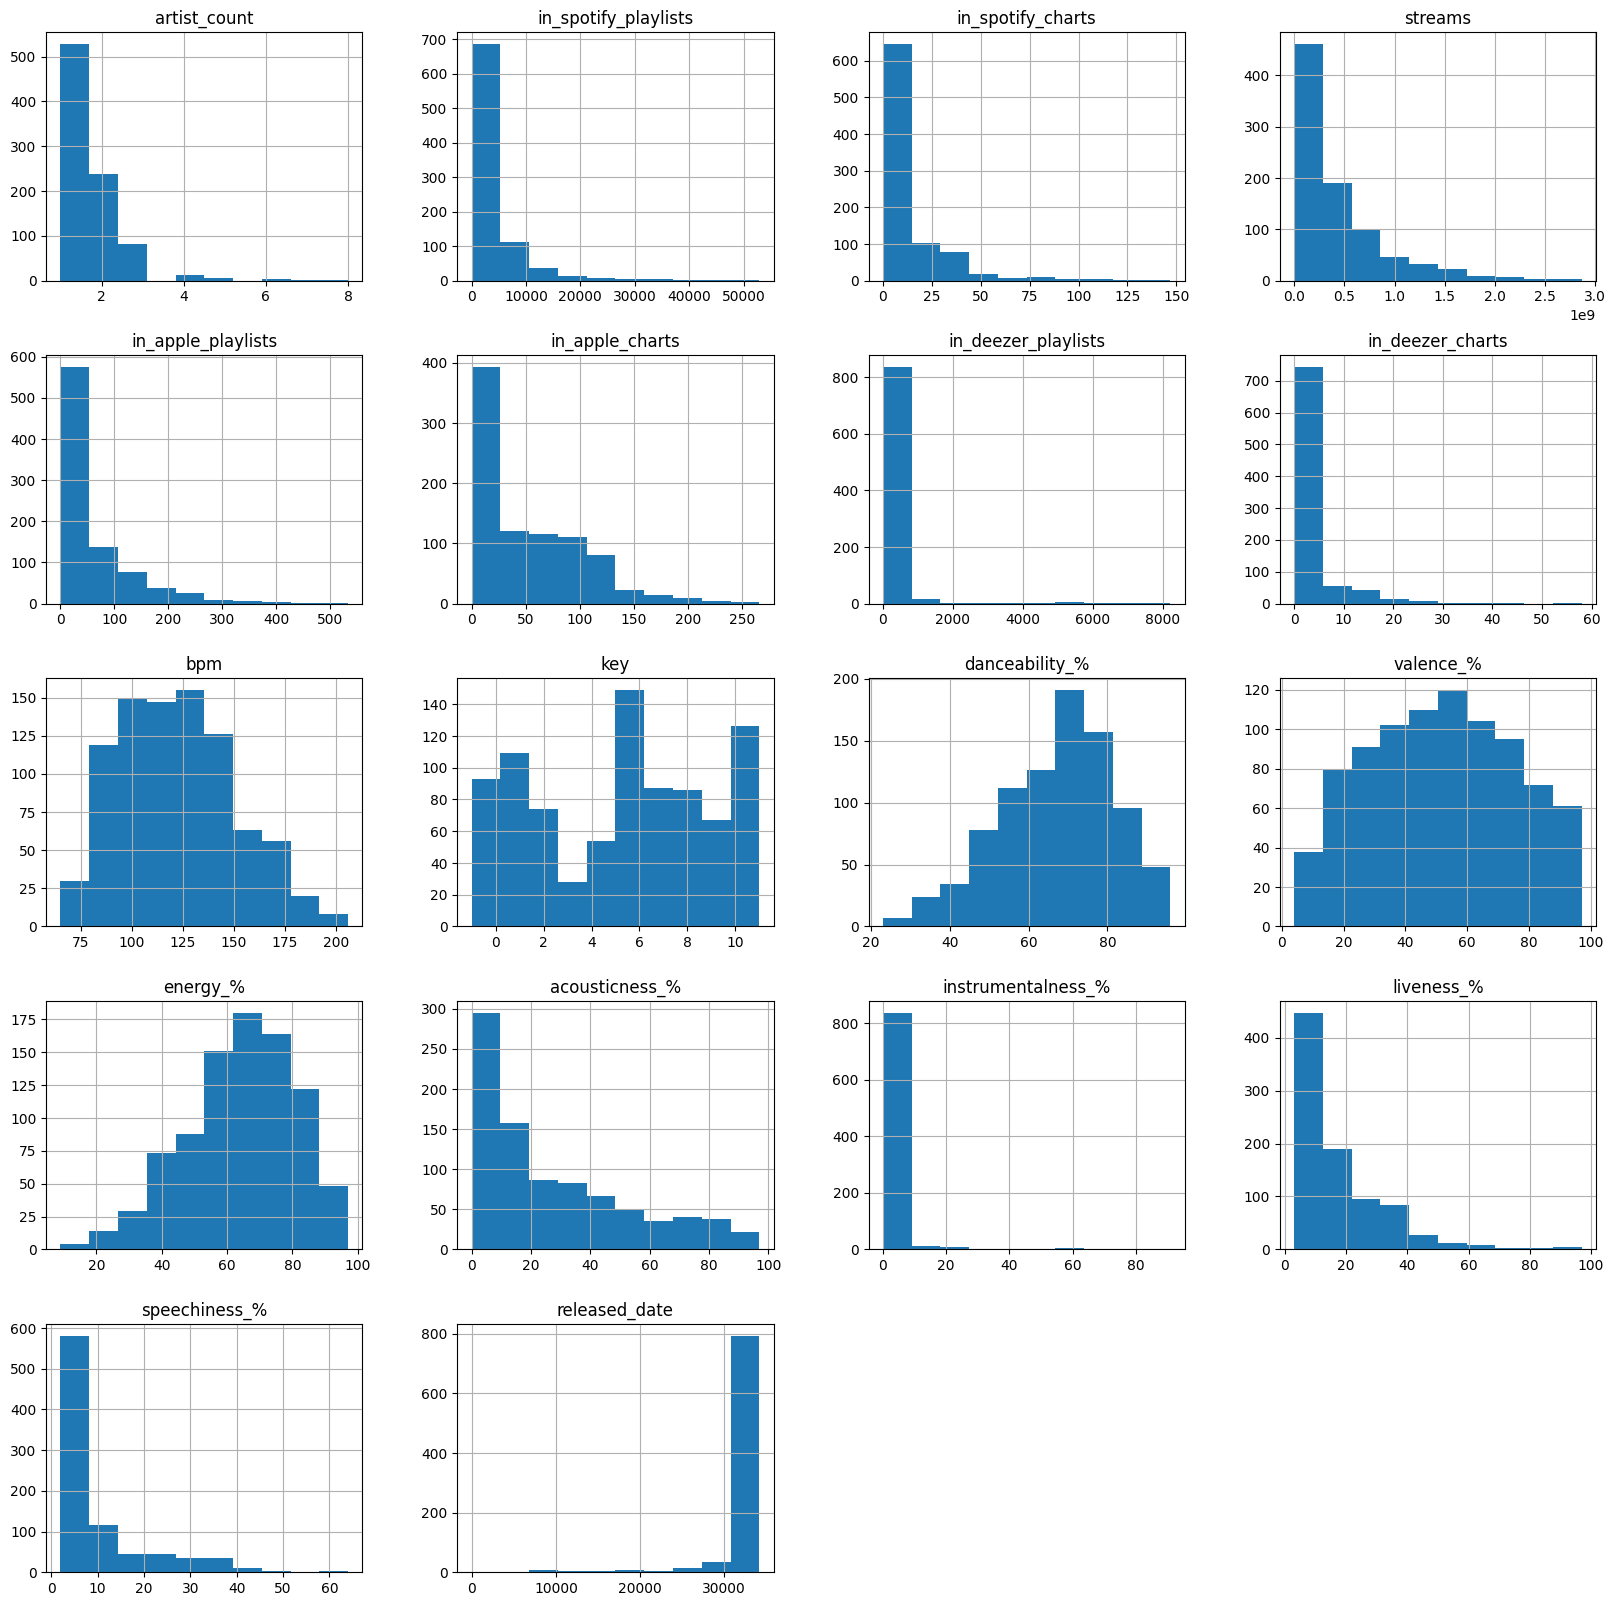

In [ ]:
spotify.hist(figsize=(20,20))

In [ ]:
spotify['total_lists'] = spotify['in_apple_playlists'] + spotify['in_deezer_playlists'].astype(np.int64) + spotify['in_spotify_playlists']
spotify['total_charts'] = spotify['in_spotify_charts'] + spotify['in_apple_charts'] + spotify['in_deezer_charts'] 

C:\Users\Acer\AppData\Local\Temp\ipykernel_22784\1802318714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = spotify.corr()


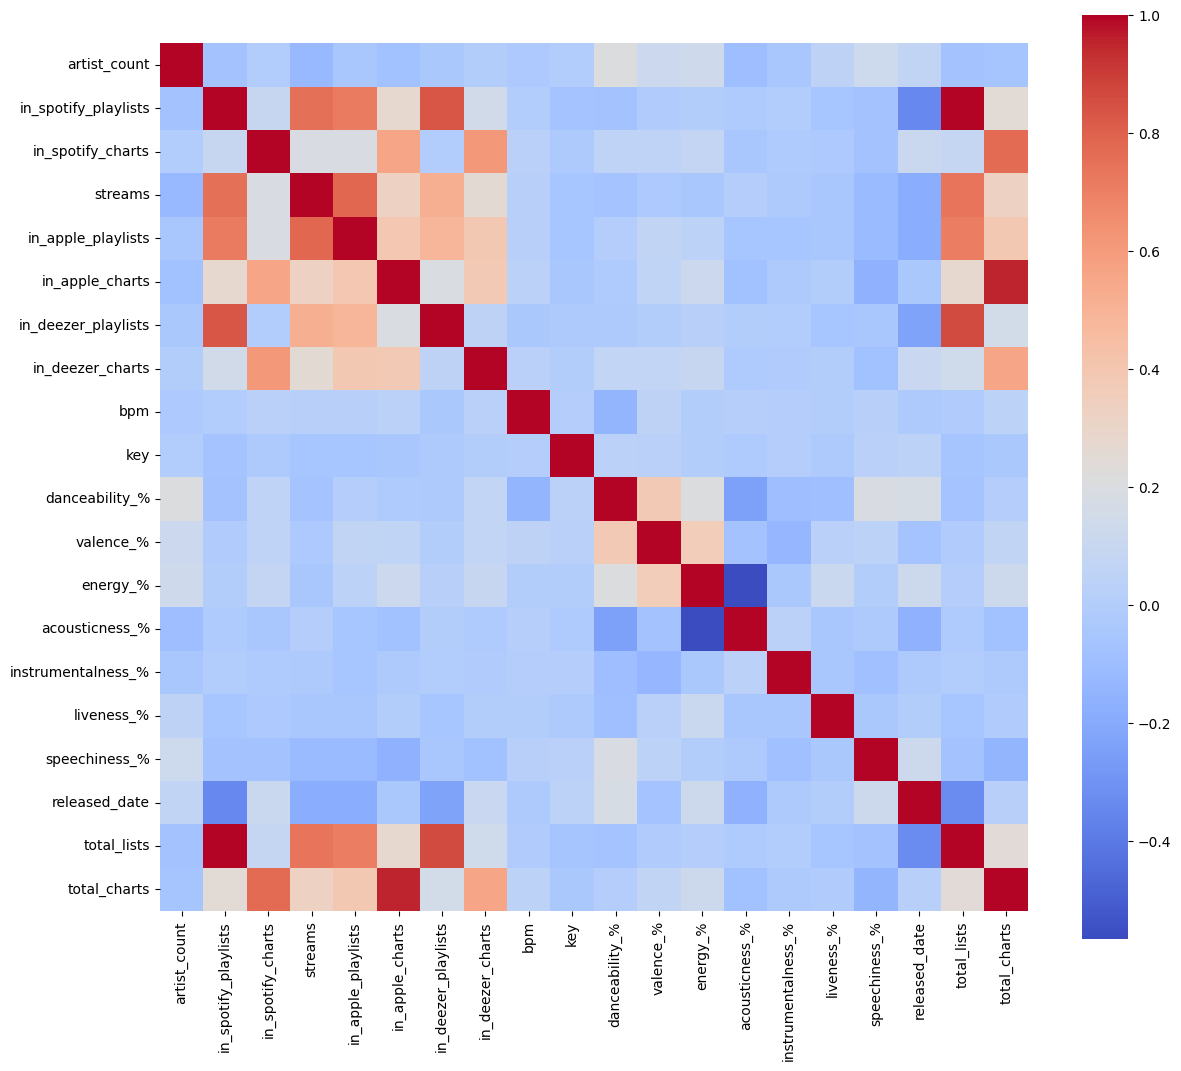

In [ ]:
mat = spotify.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(mat, cmap='coolwarm', square=True)
plt.show()

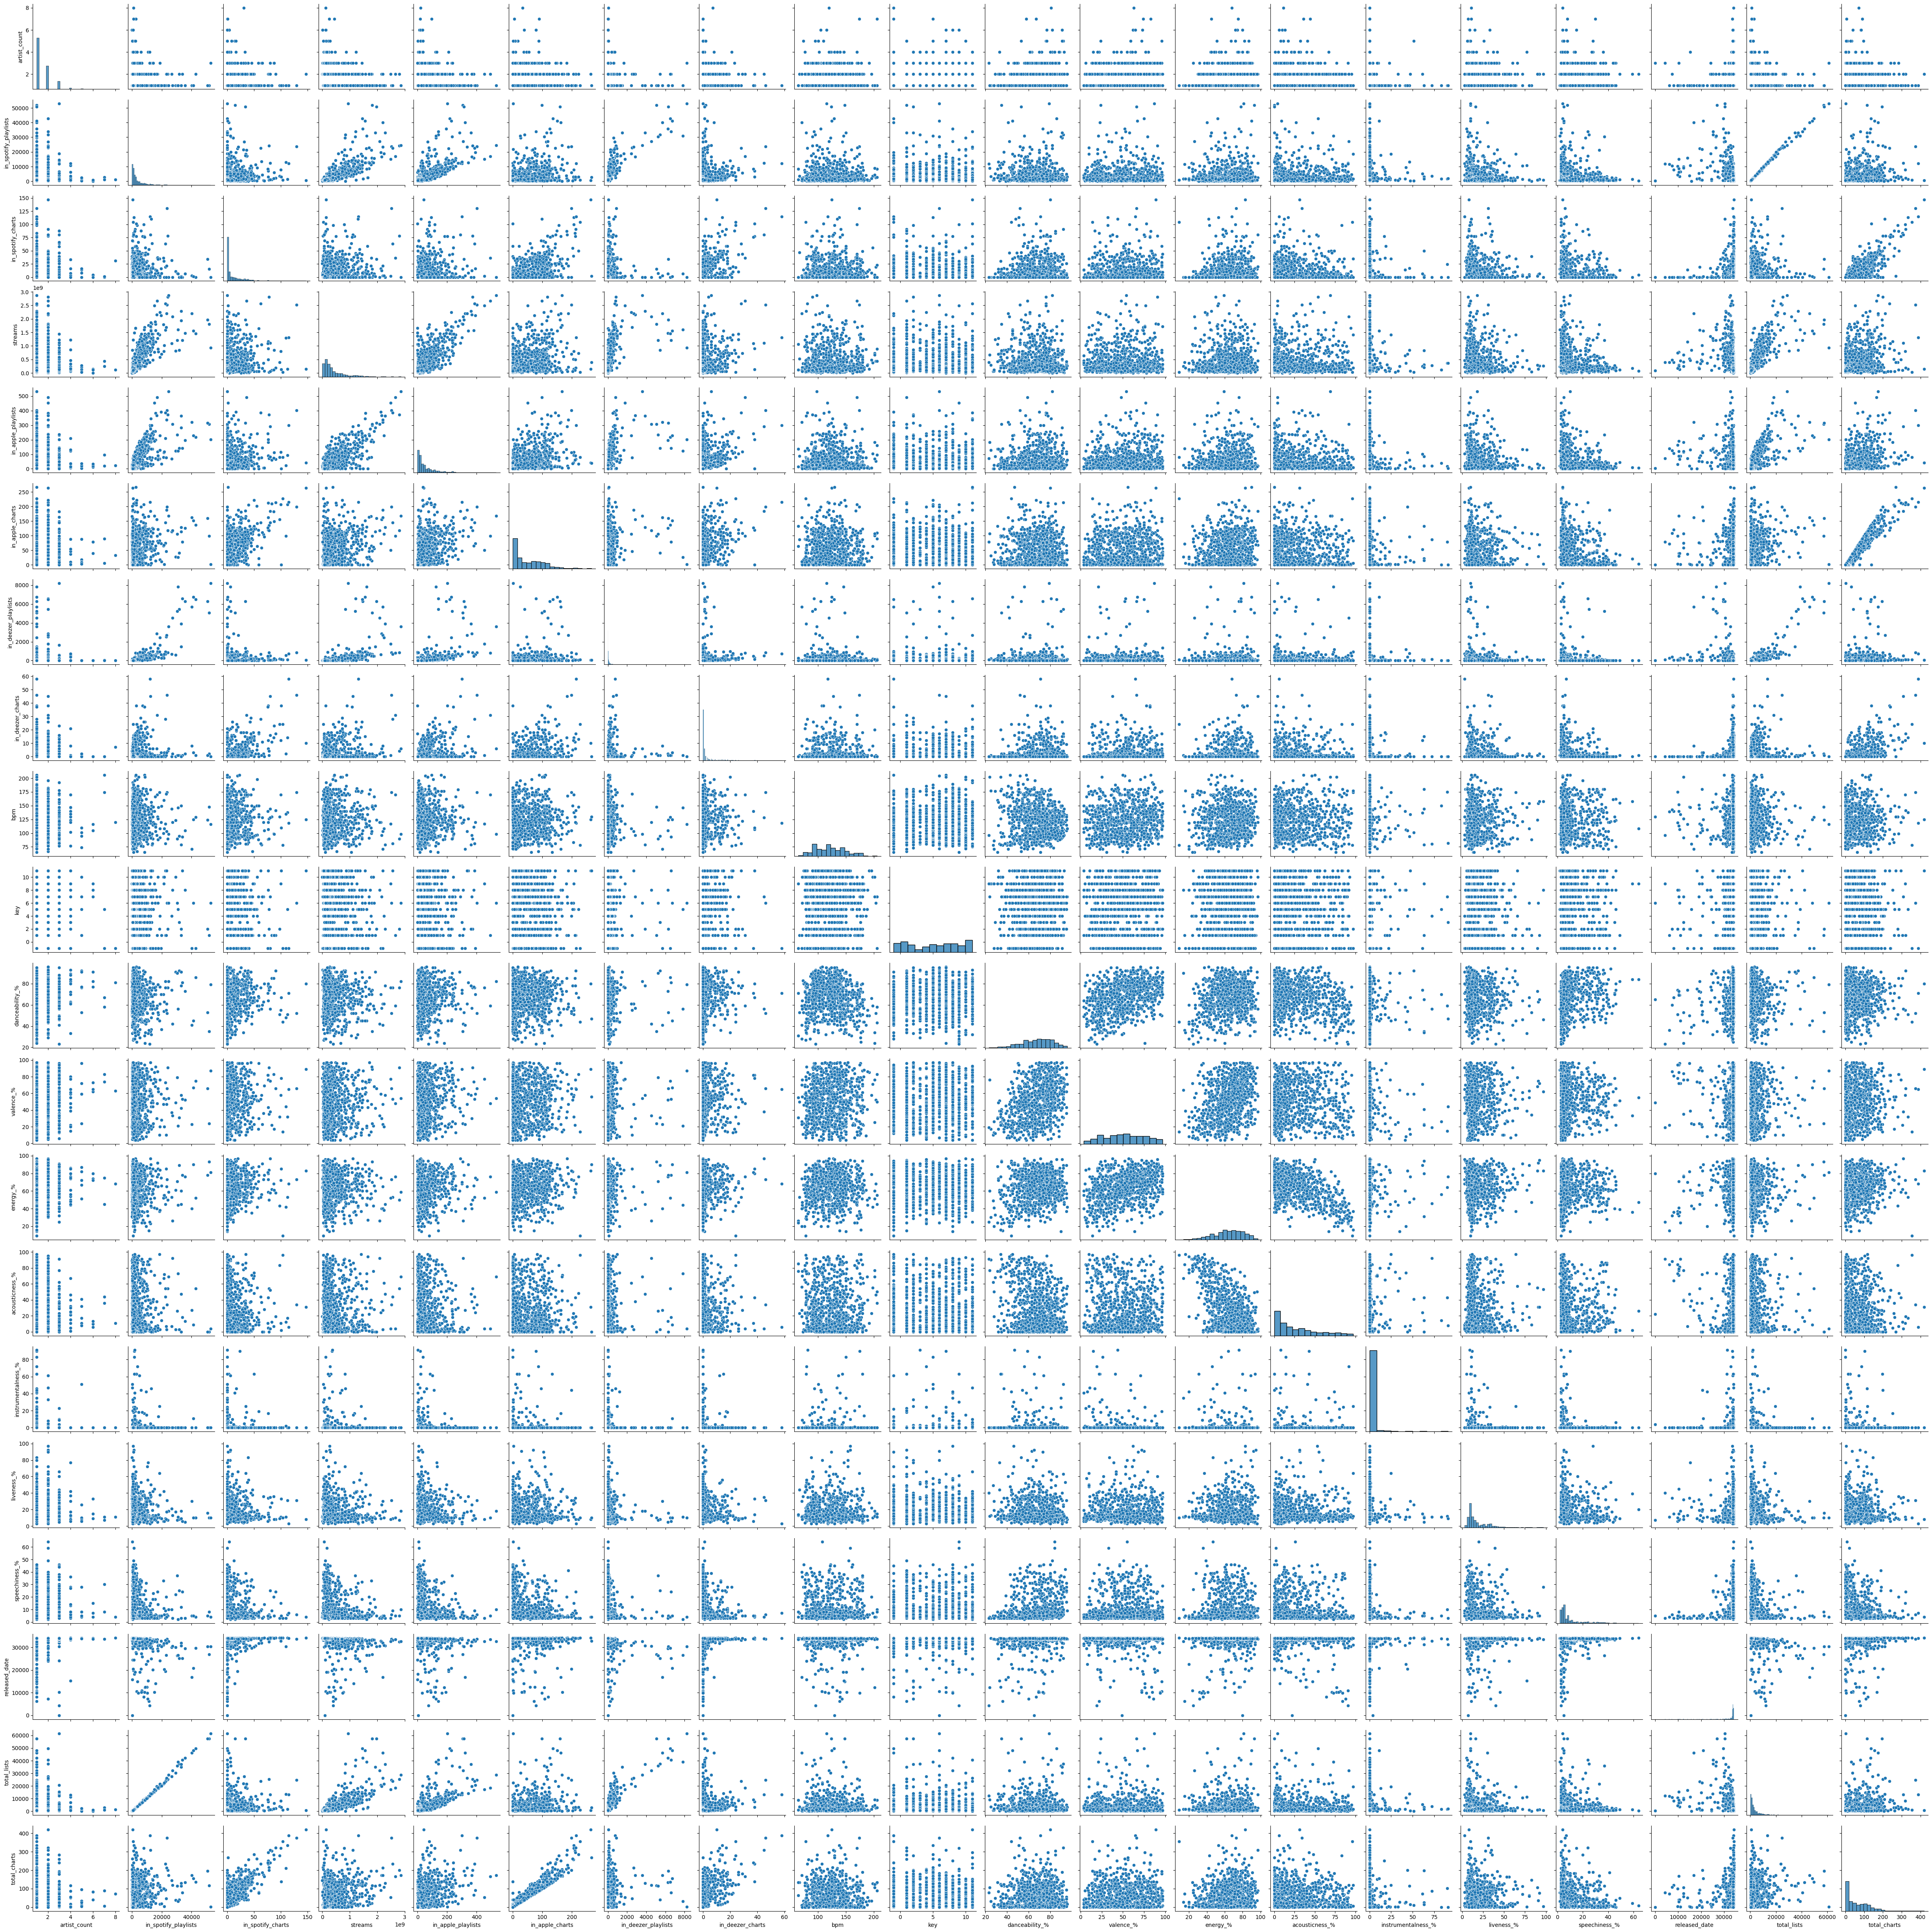

In [ ]:
sns.pairplot(spotify)

In [ ]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'released_date', 'total_lists', 'total_charts'],
      dtype='object')

In [ ]:
def make_playlist_ints(x):
    if x < 500:
        return "less than 50"
    elif x >= 500 and x < 800:
        return "betweem 50 and 800"
    elif x >= 800 and x < 1200:
        return "betweem 800 and 1200"
    elif x >= 1200 and x < 1600:
        return "betweem 1200 and 1600"
    elif x >= 1600 and x < 2000:
        return "betweem 1600 and 2000"
    elif x >= 2000 and x < 3000:
        return "betweem 2000 and 3000"
    elif x >= 3000 and x < 4000:
        return "betweem 3000 and 4000"
    elif x >= 4000 and x < 5000:
        return "betweem 4000 and 5000"
    else:
        return "above 5000"

In [ ]:
spotify['spotify_playlist_int'] = [make_playlist_ints(x) for x in spotify['in_spotify_playlists']]

NameError: name 'spotify' is not defined

In [ ]:
top50 = spotify.sort_values('streams',ascending=False)['track_name'].head(50).values
top50_spot = spotify.sort_values('streams',ascending=False)['in_spotify_playlists'].head(50).values
top50_dee = spotify.sort_values('streams',ascending=False)['in_deezer_playlists'].head(50).values
top50_apple = spotify.sort_values('streams',ascending=False)['in_apple_playlists'].head(50).values

In [ ]:
top50_apple = (top50_apple - min(top50_apple) )/ max(top50_apple)
top50_dee = (top50_dee - min(top50_dee) )/ max(top50_dee)
top50_spot = (top50_spot - min(top50_spot) )/ max(top50_spot)

In [ ]:
top502 = np.arange(50)

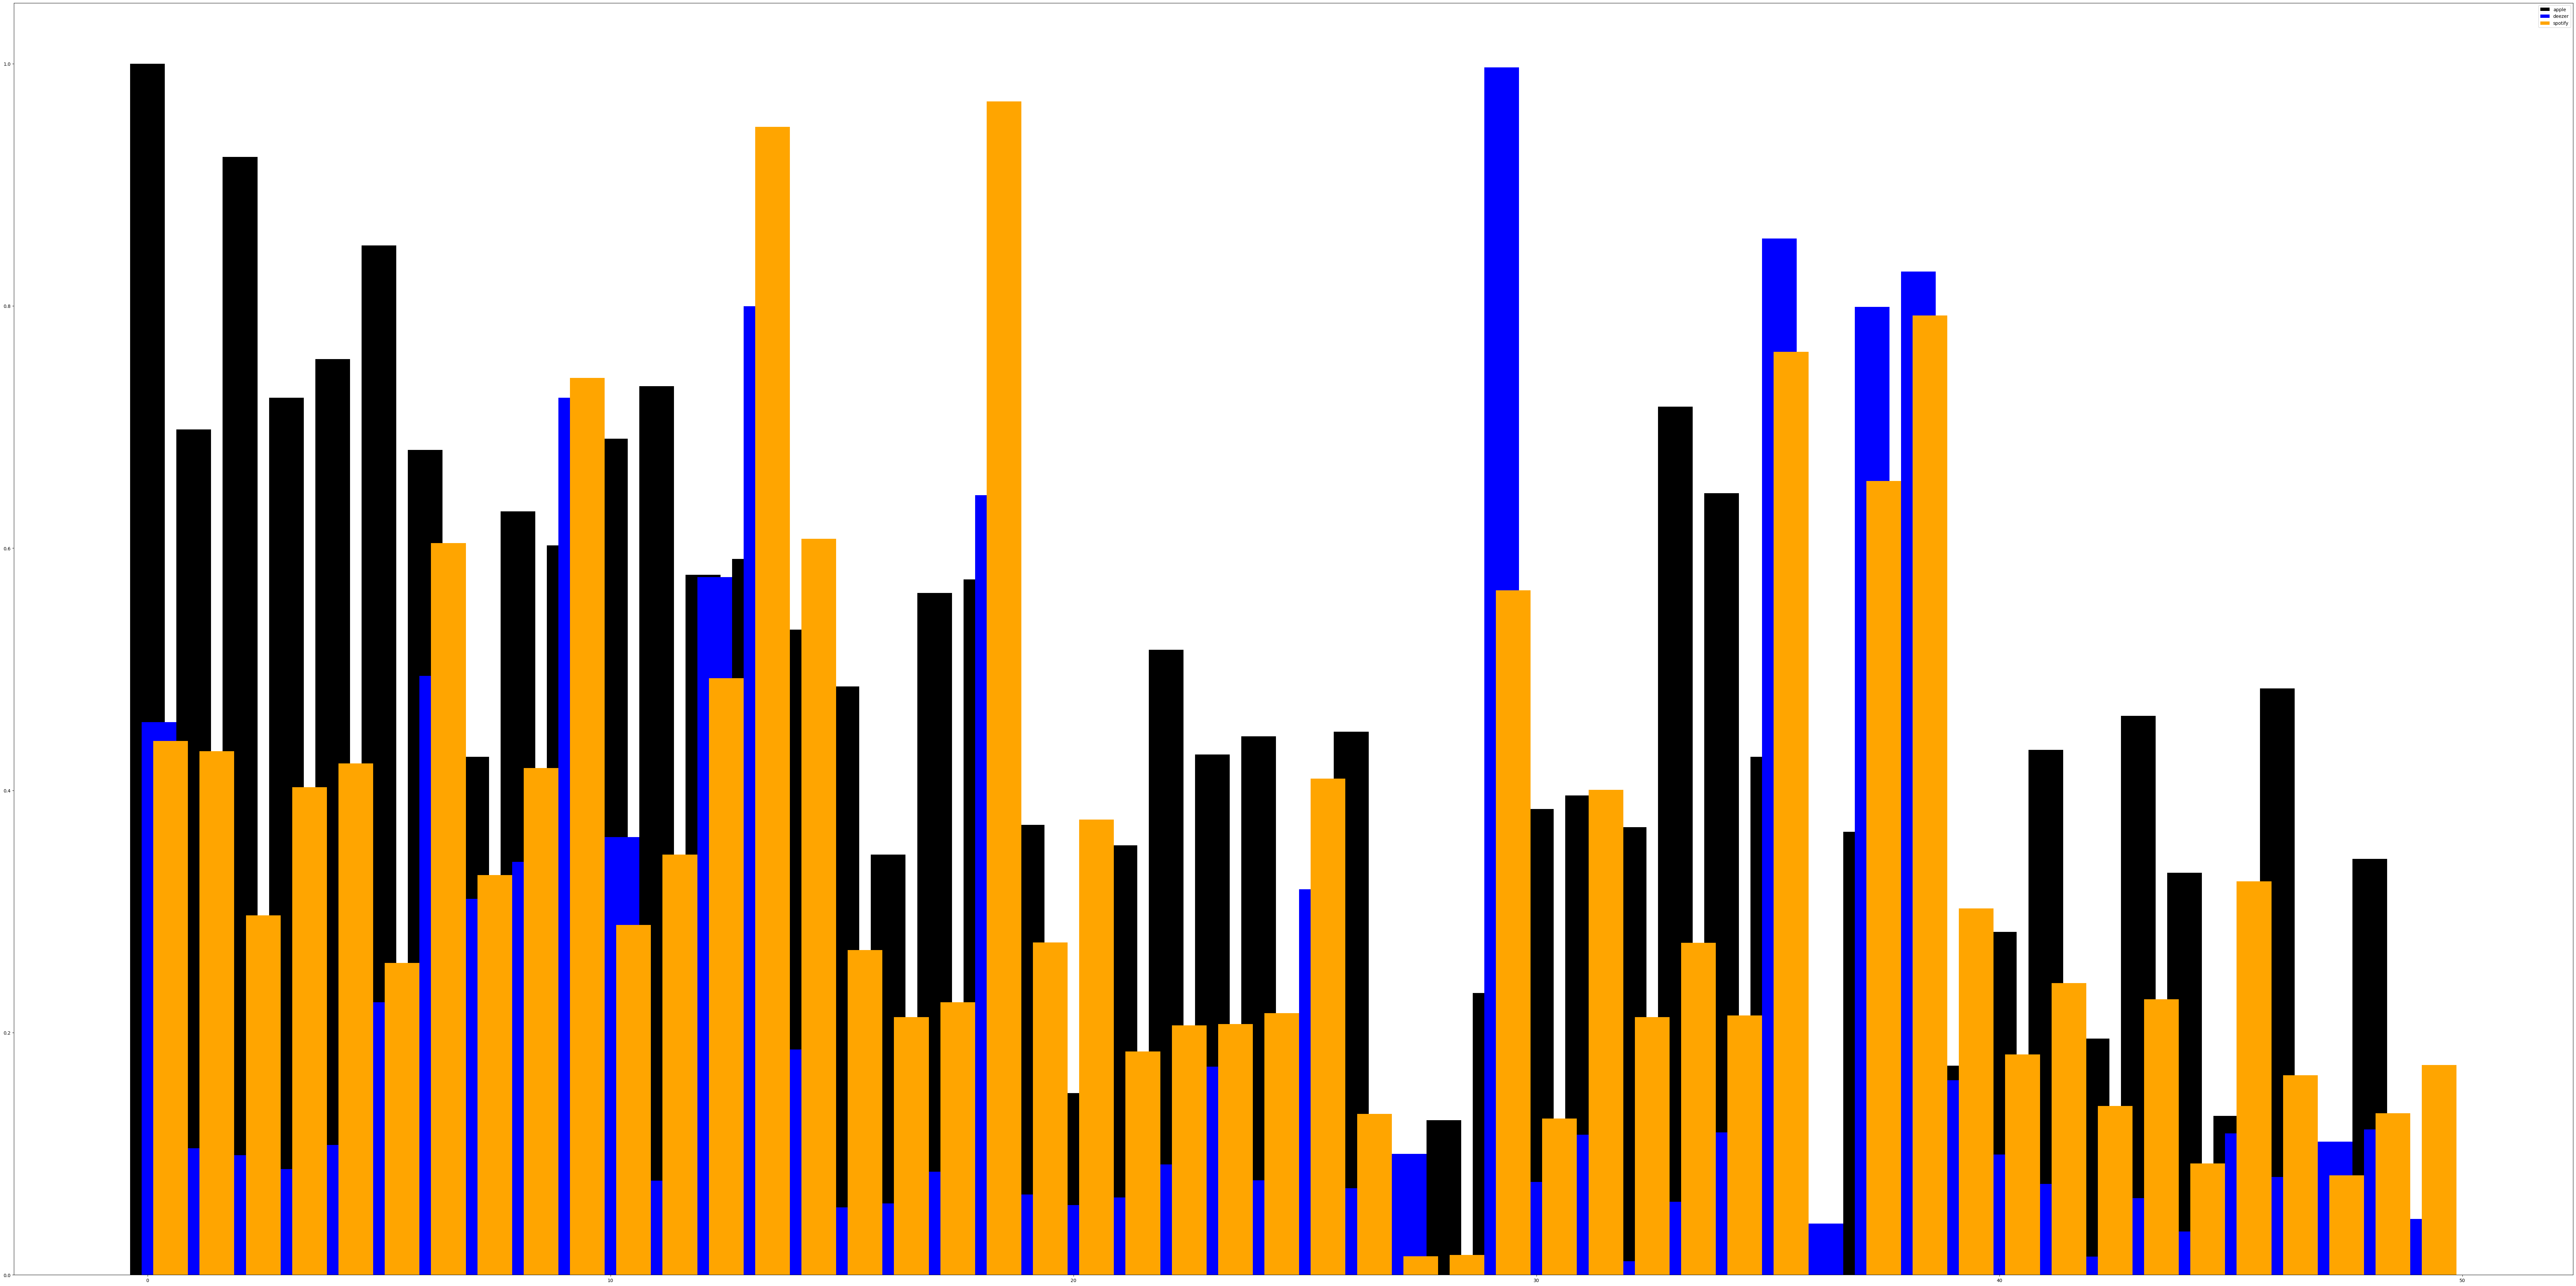

In [ ]:
plt.figure(figsize=(100,50))
width = 0.25
b1 = plt.bar(top502,top50_apple,color = 'black',width = 0.75)
b2 = plt.bar(top502 + width,top50_dee,color='blue',width=0.75)
b3 = plt.bar(top502 + 2*width,top50_spot,color='orange',width=0.75)
plt.legend( (b1, b2, b3), ('apple', 'deezer', 'spotify') ) 
plt.show()

<BarContainer object of 50 artists>

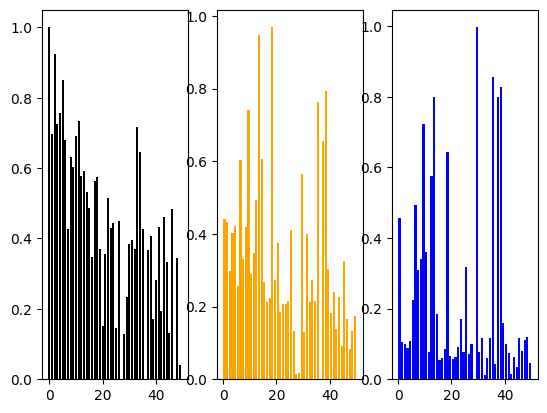

<Figure size 8000x8000 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1,3)
fig = plt.figure(figsize=(80,80))
axes[0].bar(top502,top50_apple,color = 'black')
axes[1].bar(top502 + 2*width,top50_spot,color='orange')
axes[2].bar(top502 + 2*width,top50_dee,color='blue')

In [ ]:
tail50 = spotify.sort_values('streams')['track_name'].head(50).values
tail50_spot = spotify.sort_values('streams')['in_spotify_playlists'].head(50).values
tail50_dee = spotify.sort_values('streams')['in_deezer_playlists'].head(50).values
tail50_apple = spotify.sort_values('streams')['in_apple_playlists'].head(50).values

In [ ]:
tail50_apple = (tail50_apple - min(tail50_apple) )/ max(tail50_apple)
tail50_dee = (tail50_dee - min(tail50_dee) )/ max(tail50_dee)
tail50_spot = (tail50_spot - min(tail50_spot) )/ max(tail50_spot)

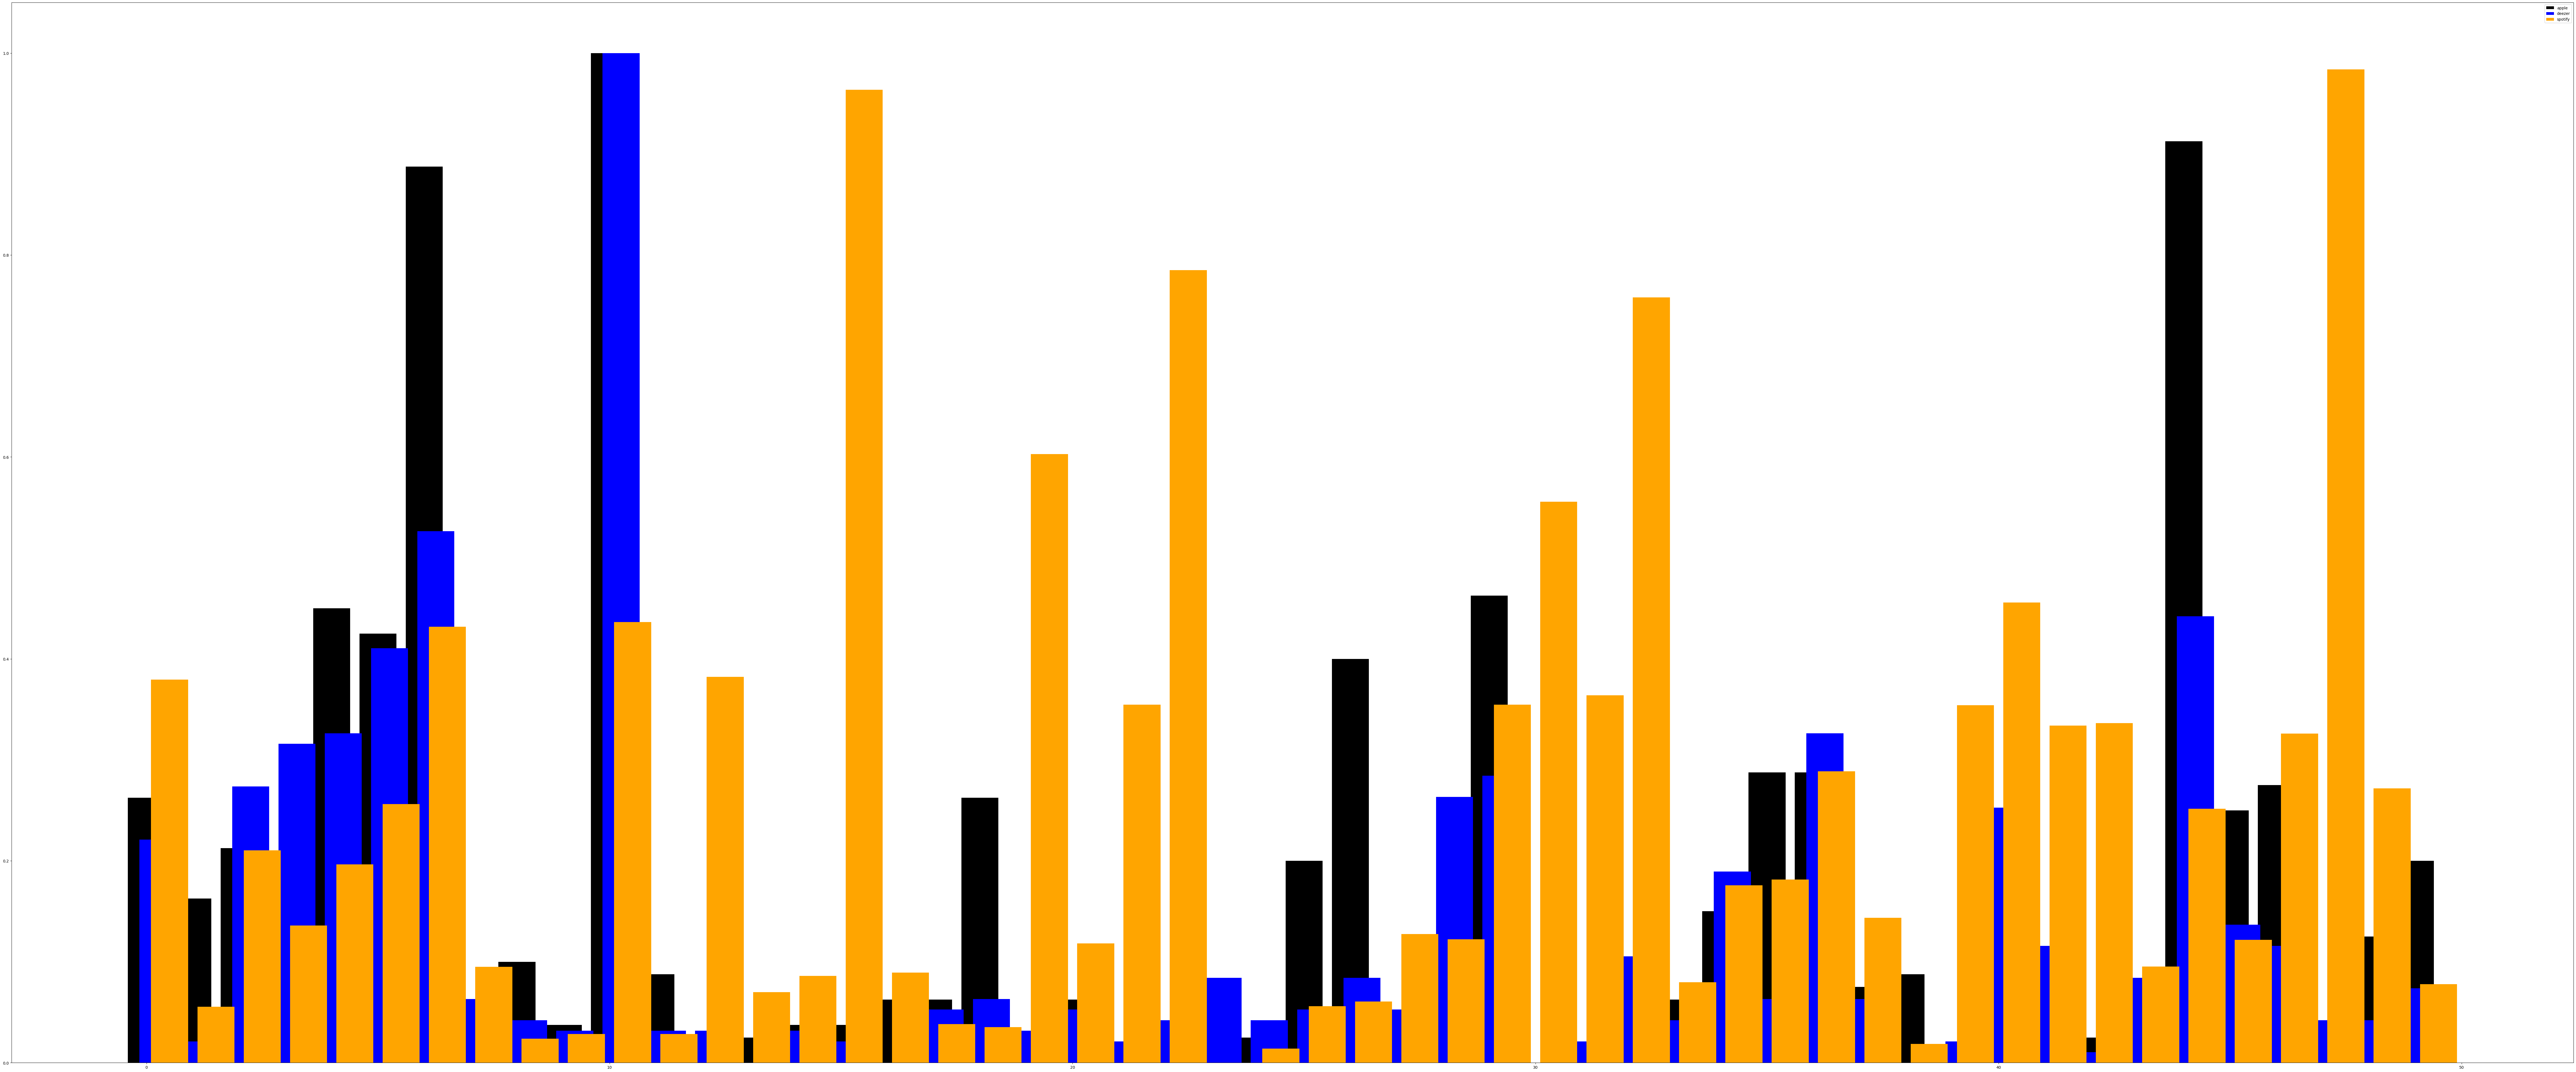

In [ ]:
plt.figure(figsize=(120,50))
width = 0.25
b1 = plt.bar(top502,tail50_apple,color = 'black')
b2 = plt.bar(top502 + width,tail50_dee,color='blue')
b3 = plt.bar(top502 + 2*width,tail50_spot,color='orange')
plt.legend( (b1, b2, b3), ('apple', 'deezer', 'spotify') ) 
plt.show()

In [ ]:
spotify['scaled_streams'] = (spotify['streams'] - min(spotify['streams'])) / (max(spotify['streams']) -min(spotify['streams']))

In [ ]:
def make_streams_ints(x):
    if x < 0.025:
        return "less than 0.025"
    elif x >= 0.025 and x < 0.05:
        return "betweem 0.025 and 0.05"
    elif x >= 0.05 and x < 0.075:
        return "betweem 0.05 and 0.075"
    elif x >= 0.075 and x < 0.1:
        return "betweem 0.075 and 0.1"
    elif x >= 0.1 and x < 0.15:
        return "betweem 0.1 and 0.15"
    elif x >= 0.15 and x < 0.19:
        return "betweem 0.15 and 0.19"
    elif x >= 0.19 and x < 0.21:
        return "betweem 0.19 and 0.21"
    else:
        return "above 0.21"

In [ ]:
spotify['streams_int'] = [make_streams_ints(x) for x in spotify['scaled_streams']]

In [ ]:
means = []
for i in spotify['artist_count'].unique():
    means.append(spotify[spotify['artist_count'] == i]['streams'].mean())
means

[420364353.0669456,
 474002949.0056818,
 318797532.6097561,
 123122413.0,
 310818044.0769231,
 144808200.4,
 87466453.0,
 339060067.5]

Text(0, 0.5, 'mean streams')

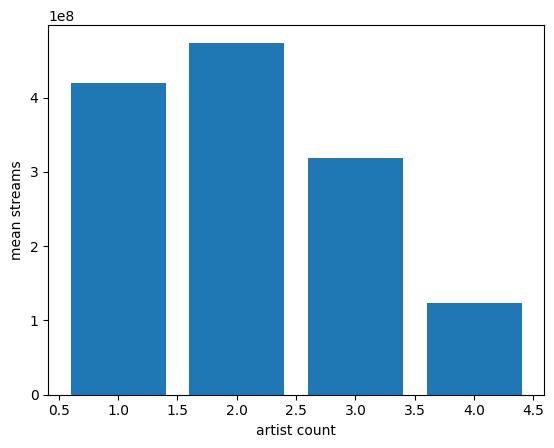

In [ ]:
plt.bar(np.arange(4) + 1,means[0:4])
plt.xlabel("artist count")
plt.ylabel("mean streams")

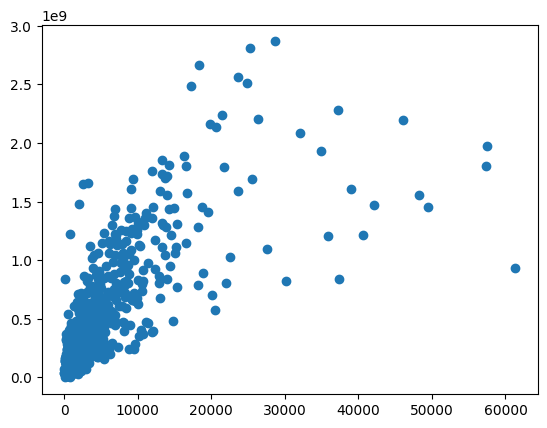

In [ ]:
plt.scatter(spotify['total_lists'],spotify['streams'])

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 952
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            873 non-null    object 
 1   artist(s)_name        873 non-null    object 
 2   artist_count          873 non-null    int64  
 3   in_spotify_playlists  873 non-null    int64  
 4   in_spotify_charts     873 non-null    int64  
 5   streams               873 non-null    int64  
 6   in_apple_playlists    873 non-null    int64  
 7   in_apple_charts       873 non-null    int64  
 8   in_deezer_playlists   873 non-null    int64  
 9   in_deezer_charts      873 non-null    int64  
 10  in_shazam_charts      834 non-null    object 
 11  bpm                   873 non-null    int64  
 12  key                   873 non-null    float64
 13  mode                  873 non-null    object 
 14  danceability_%        873 non-null    int64  
 15  valence_%             8

In [ ]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'released_date', 'total_lists', 'total_charts', 'spotify_playlist_int',
       'scaled_streams', 'streams_int'],
      dtype='object')

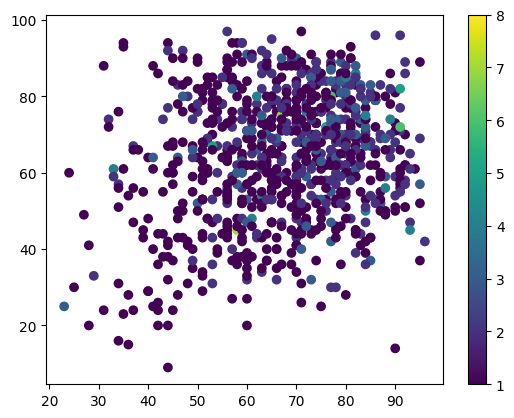

In [ ]:
plt.scatter(spotify['danceability_%'],spotify['energy_%'],c = spotify['artist_count'],cmap = 'viridis'
)
plt.colorbar()

<BarContainer object of 873 artists>

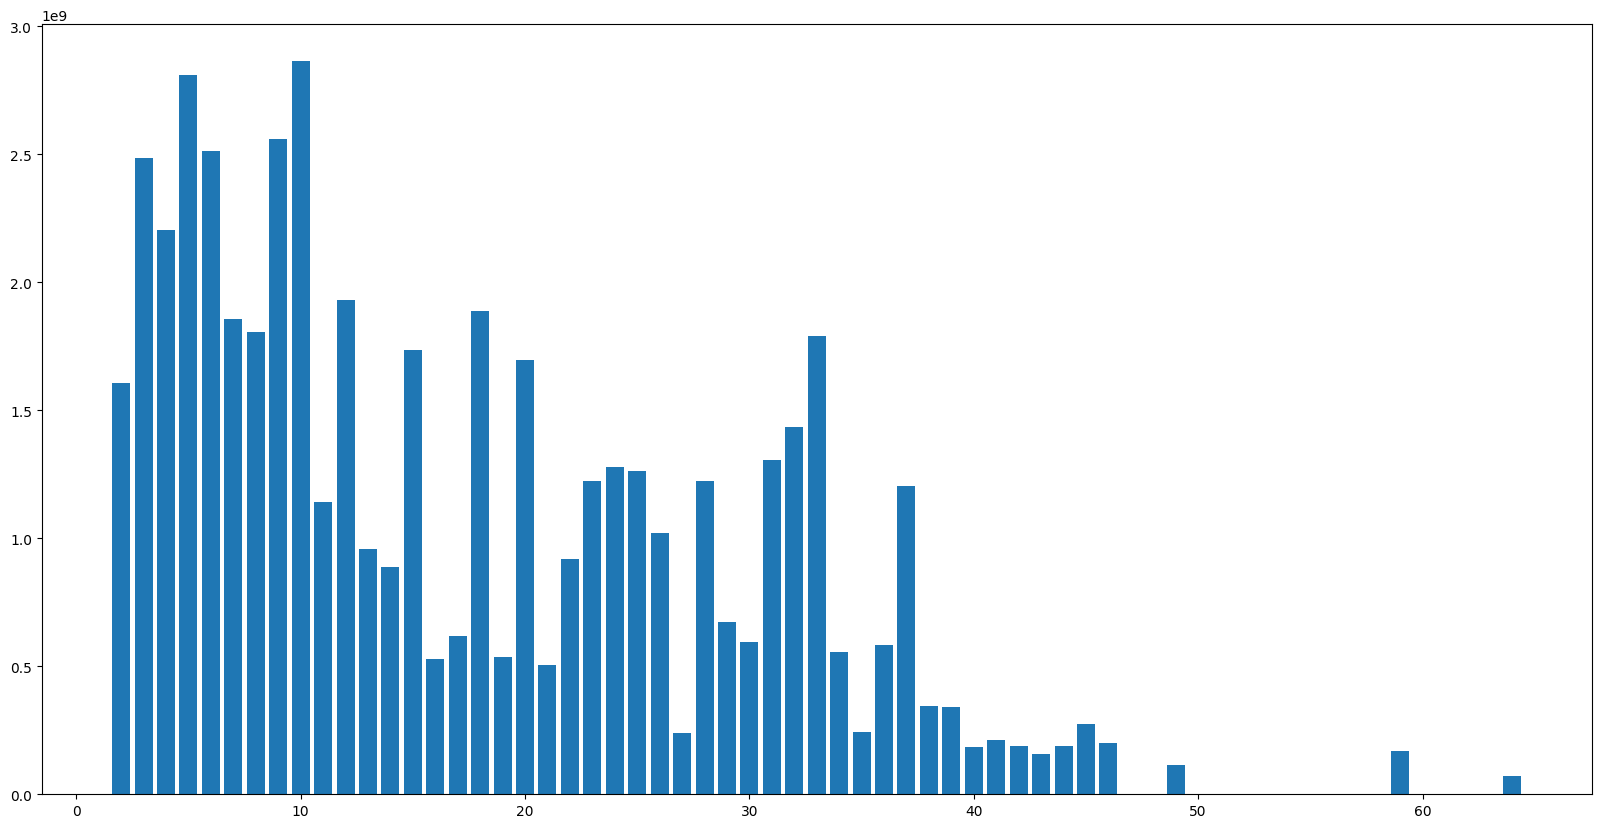

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(spotify['speechiness_%'],spotify['streams'])

<BarContainer object of 873 artists>

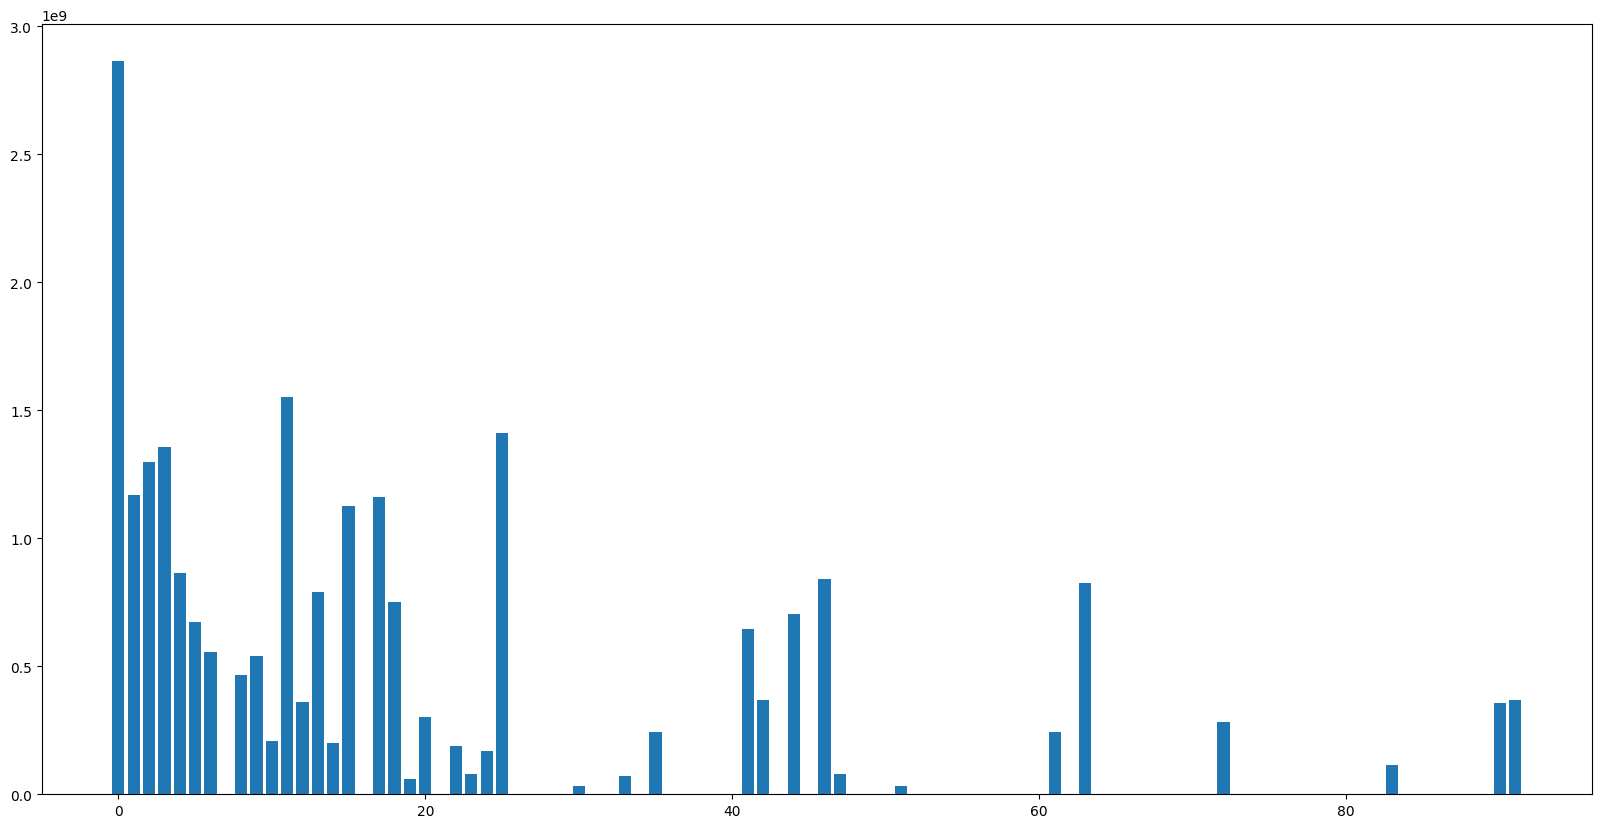

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(spotify['instrumentalness_%'],spotify['streams'])

Text(0, 0.5, 'track_names')

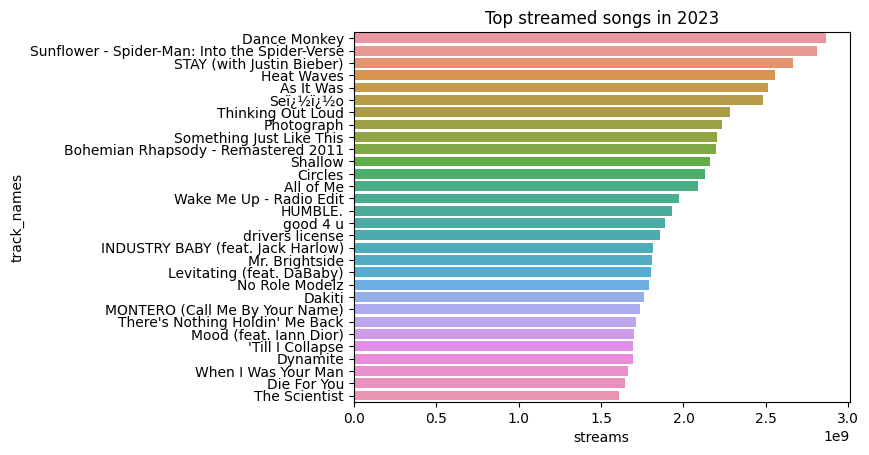

In [ ]:

df_streaming = spotify.sort_values(by='streams', ascending=False).head(30)

plt.figure()

sns.barplot(x = 'streams', y = 'track_name', data = df_streaming)
plt.title('Top streamed songs in 2023')
plt.xlabel('streams')
plt.ylabel('track_names')

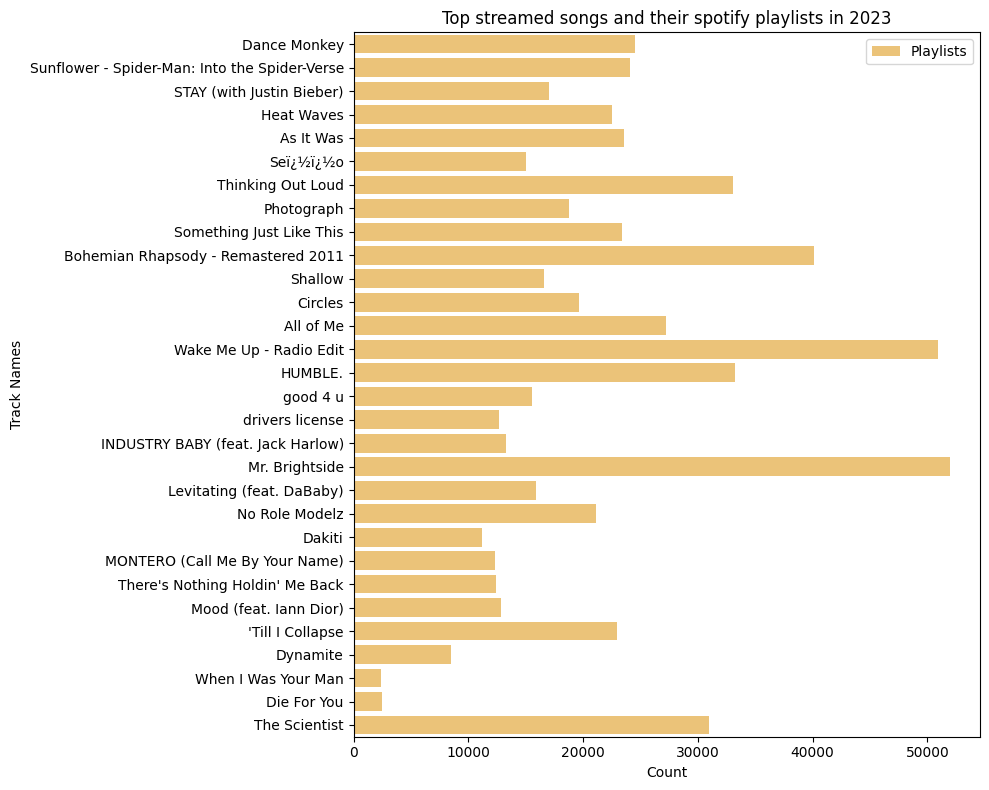

In [ ]:
# Assuming 'playlists' is the column representing the number of playlists in your DataFrame
# Update this according to your actual column name

# Sorting the DataFrame by streams and selecting the top 30 streamed songs
df_streaming = spotify.sort_values(by='streams', ascending=False).head(30)

# Creating the bar plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Plotting streams and playlists for the top 30 streamed songs
sns.barplot(x='in_spotify_playlists', y='track_name', data=df_streaming, label='Playlists', color='orange', alpha=0.6)

plt.title('Top streamed songs and their spotify playlists in 2023')
plt.xlabel('Count')
plt.ylabel('Track Names')

# Show legend
plt.legend()

plt.tight_layout()
plt.show()



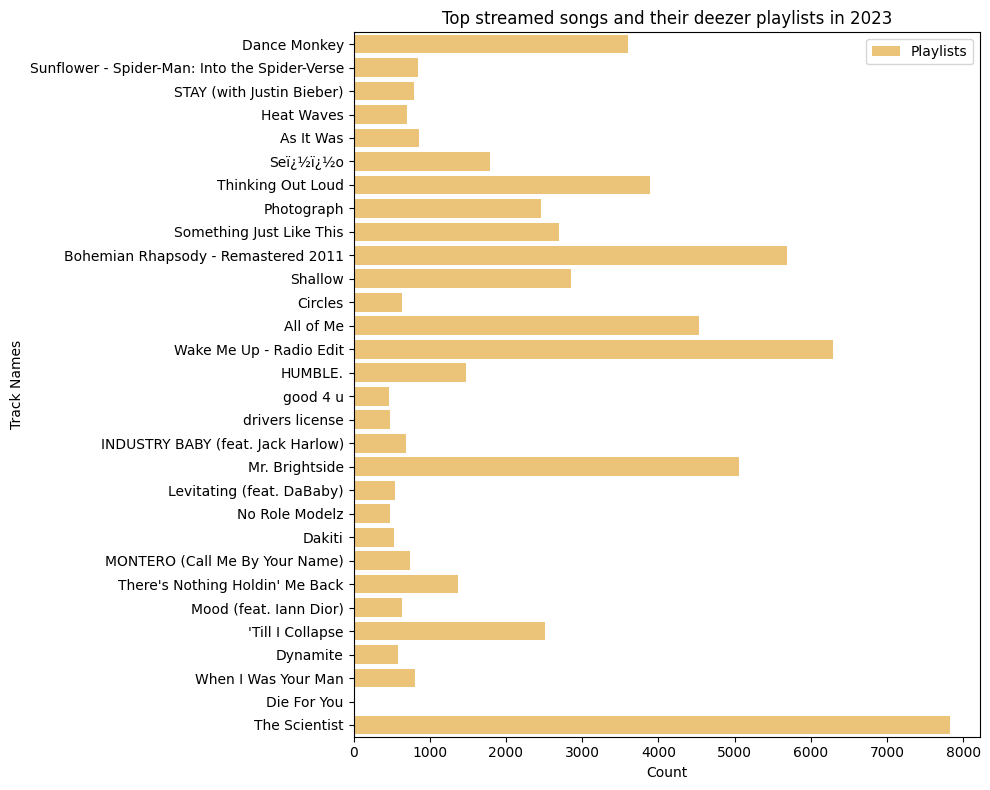

In [ ]:
# Assuming 'playlists' is the column representing the number of playlists in your DataFrame
# Update this according to your actual column name

# Sorting the DataFrame by streams and selecting the top 30 streamed songs
df_streaming = spotify.sort_values(by='streams', ascending=False).head(30)

# Creating the bar plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Plotting streams and playlists for the top 30 streamed songs
sns.barplot(x='in_deezer_playlists', y='track_name', data=df_streaming, label='Playlists', color='orange', alpha=0.6)

plt.title('Top streamed songs and their deezer playlists in 2023')
plt.xlabel('Count')
plt.ylabel('Track Names')

# Show legend
plt.legend()

plt.tight_layout()
plt.show()



Text(0, 0.5, 'energy')

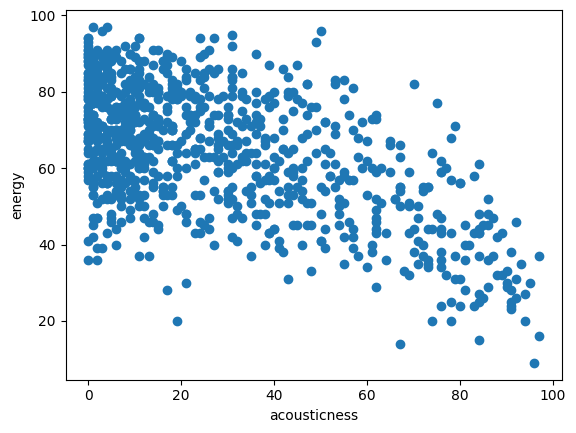

In [ ]:
plt.scatter(spotify['acousticness_%'], spotify['energy_%'])


plt.xlabel('acousticness')
plt.ylabel('energy')

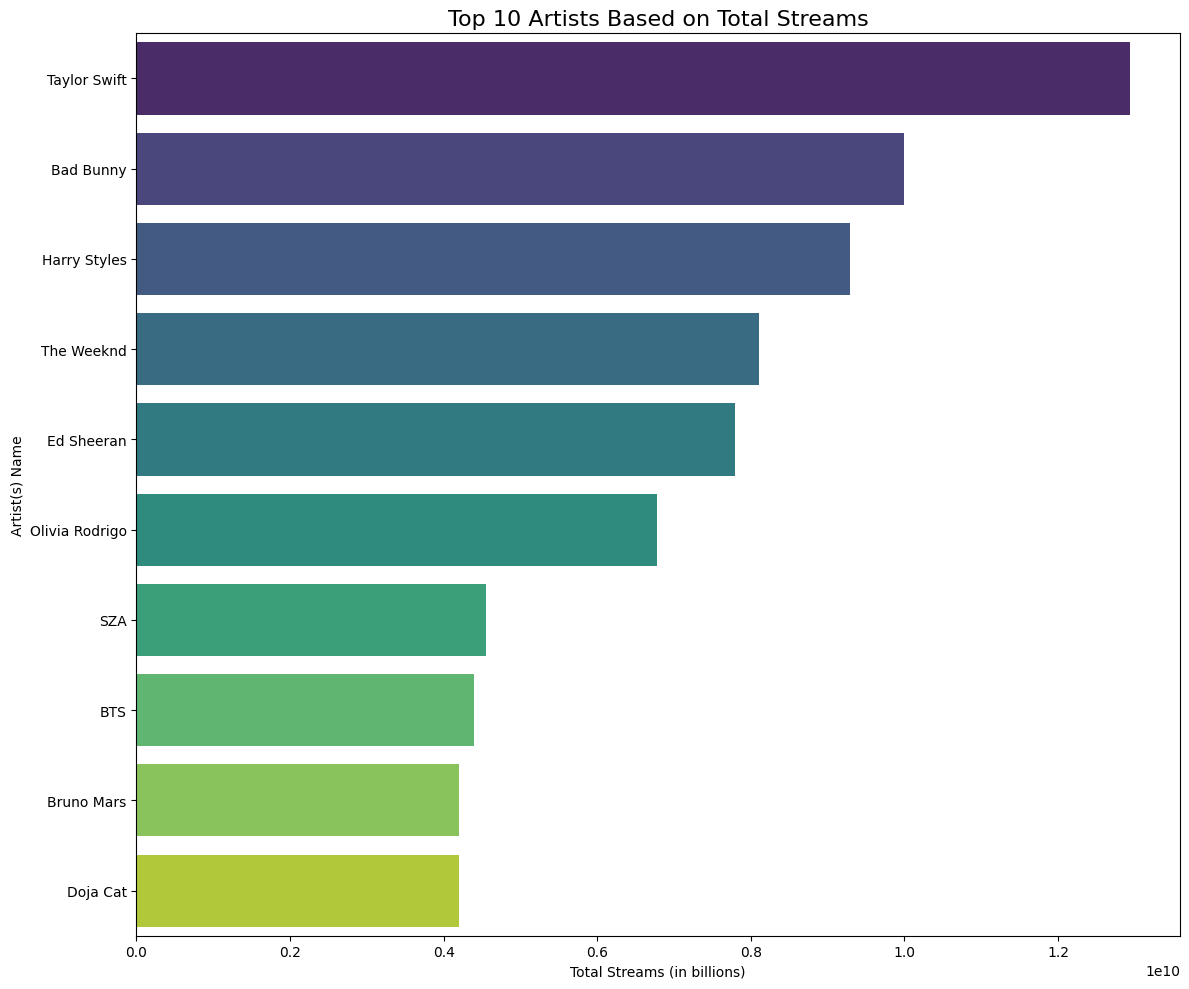

In [ ]:
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')

# Grouping by artist(s) again and summing up their streams
artist_streams = spotify.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Plotting the artists with the most streams again
plt.figure(figsize=(12, 10))
sns.barplot(x=artist_streams.values, y=artist_streams.index, palette="viridis", orient='h')
plt.title('Top 10 Artists Based on Total Streams', fontsize=16)
plt.xlabel('Total Streams (in billions)')
plt.ylabel('Artist(s) Name')
plt.tight_layout()
plt.show()